# Import and explore data

In [1]:
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt

plt.close("all")

In [2]:
candy = pd.read_csv('candy-data.csv')
candy['competitorname'] = candy['competitorname'].replace("Õ", "'", regex=True)

In [3]:
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [4]:
candy.shape

(85, 13)

In [5]:
candy.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [27]:
candy[candy.isna()].count()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
types               0
dtype: int64

In [28]:
candy[candy.isnull()].count()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
types               0
dtype: int64

# Transformation ( reversing one hot encoding )

In [7]:
def get_candy(row):
    for c in candy.columns:
        if row[c]==1:
            return c

candy.apply(get_candy, axis=1)

0     chocolate
1     chocolate
2          None
3          None
4        fruity
        ...    
80       fruity
81       fruity
82       fruity
83      caramel
84    chocolate
Length: 85, dtype: object

In [8]:
candy['types'] = candy.apply(get_candy, axis=1)

<Figure size 432x288 with 0 Axes>

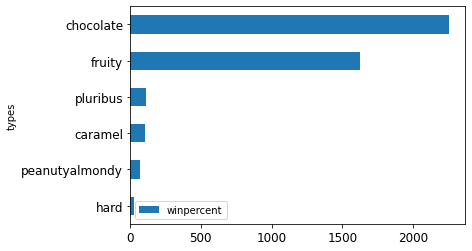

In [9]:
desc =candy.groupby('types')[['winpercent']].sum().sort_values(by ='winpercent')

plt.figure()
ax = desc.plot(kind="barh", fontsize=12)

<Figure size 432x288 with 0 Axes>

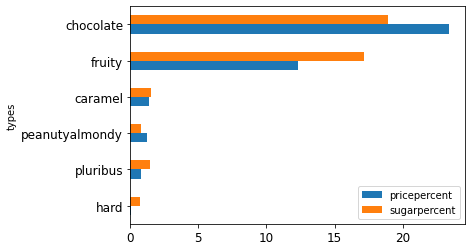

In [10]:
desc = candy.groupby('types')[['pricepercent','sugarpercent']].sum().sort_values(by ='pricepercent')

plt.figure()

ax = desc.plot(kind="barh", fontsize=12)


<Figure size 432x288 with 0 Axes>

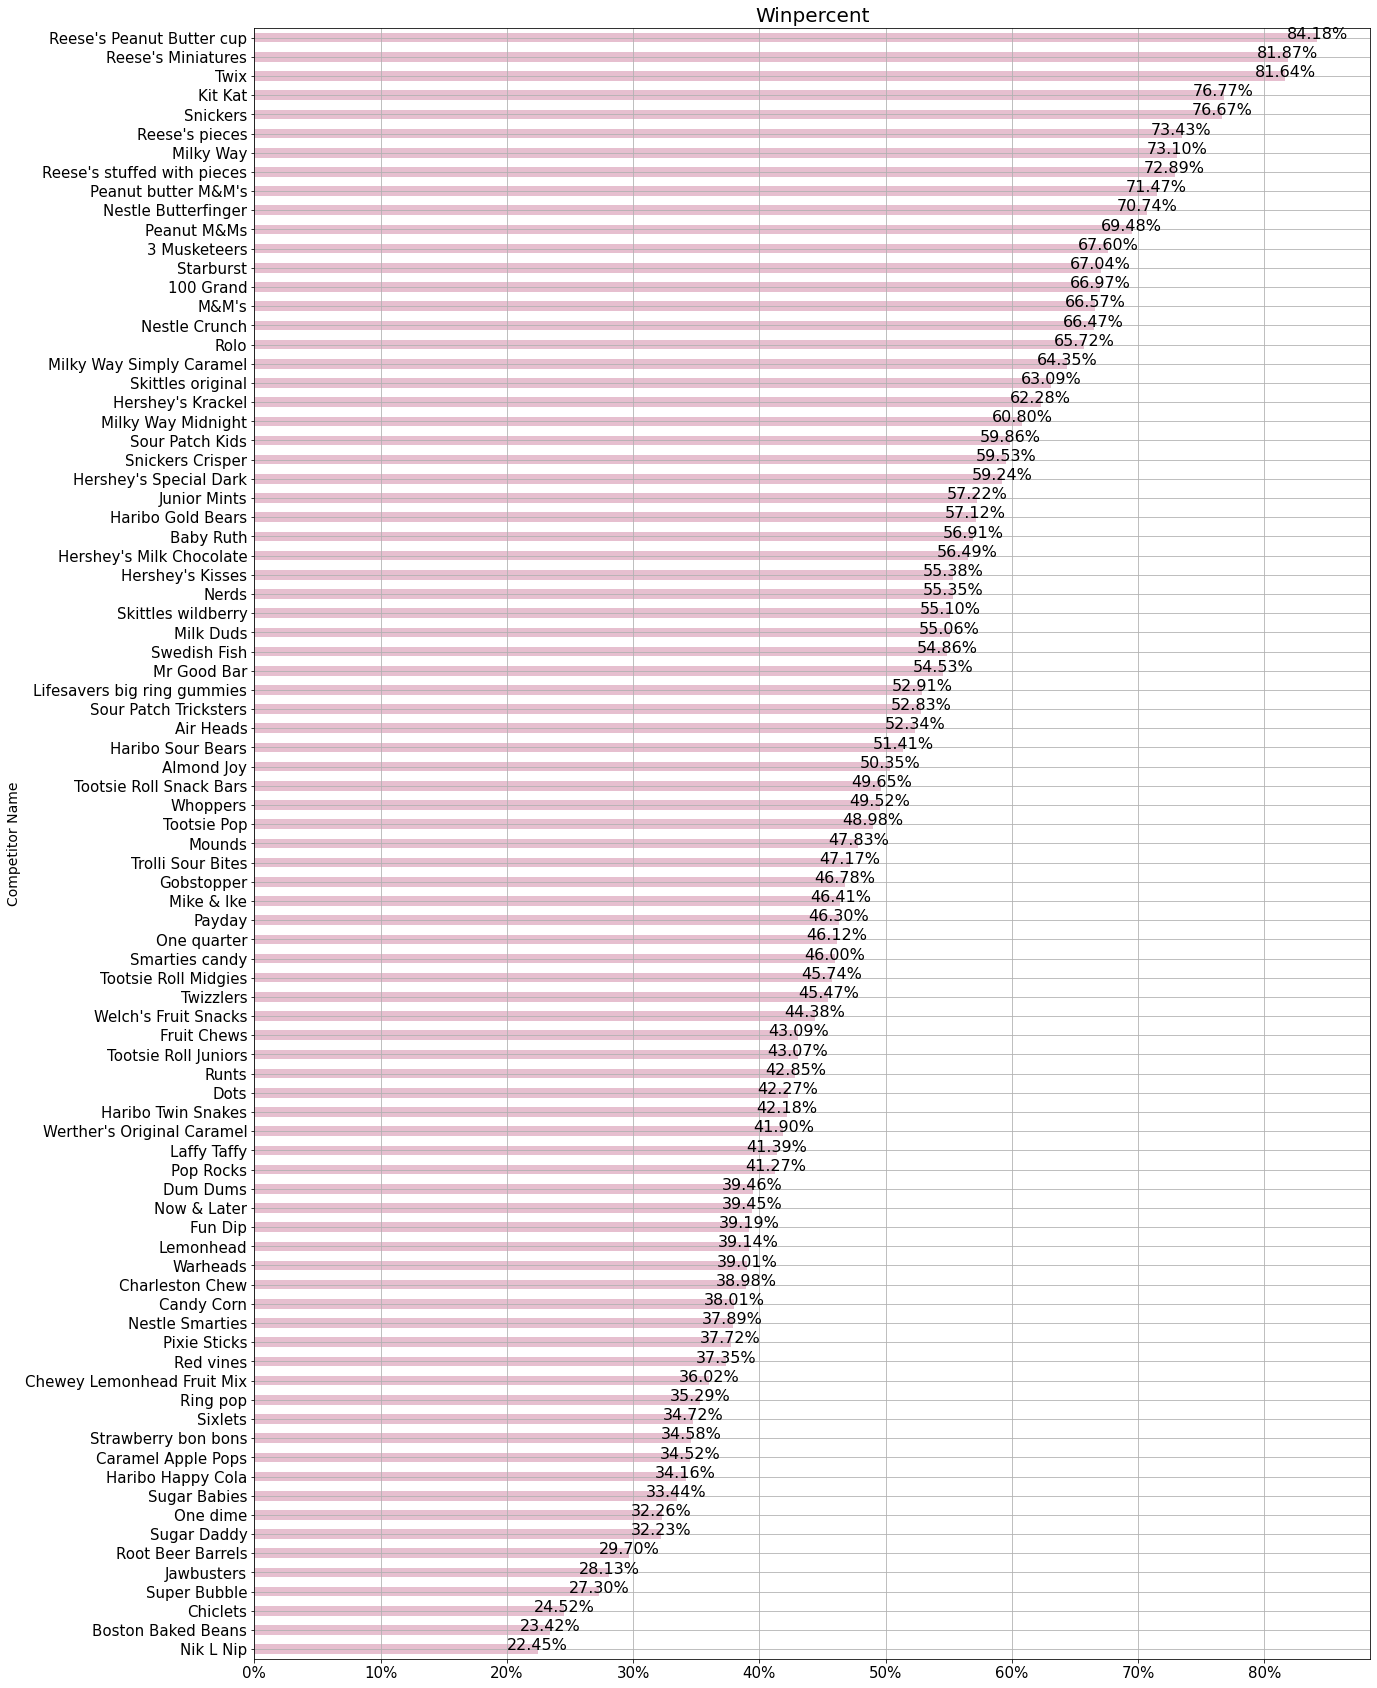

In [49]:
import matplotlib.ticker as mtick
desc =candy.groupby('competitorname')[['winpercent']].sum().sort_values(by ='winpercent')
fig= plt.figure()

cmap = cm.get_cmap('Spectral')
ax = desc.plot(kind="barh", fontsize=15.,linestyle='--', cmap = cmap,
                   alpha=.25 , grid = True)


ax.xaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    
    x, y = p.get_xy() 
    ax.annotate(f'{width:.2f}%', (x + width, y + height*0.4), ha='center',fontsize=16)

plt.gcf().set_size_inches(20, 30)
plt.ylabel(ylabel='Competitor Name',fontsize=14)
plt.title('Winpercent', fontsize = 20)
ax.get_legend().remove()
plt.show()

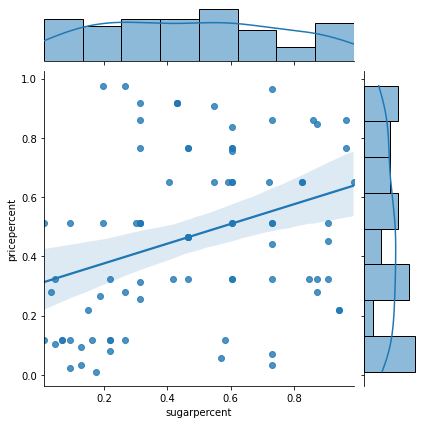

In [12]:
import seaborn as sns
sns.jointplot(data=candy, x="sugarpercent", y="pricepercent", kind="reg")

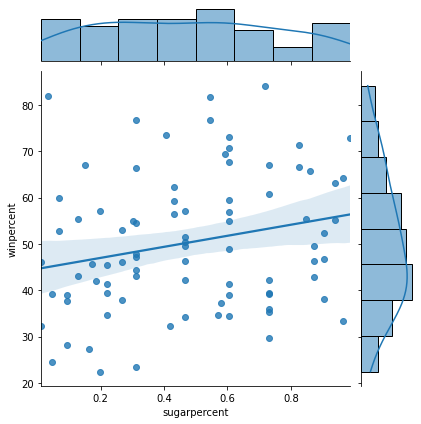

In [13]:
sns.jointplot(data=candy, x="sugarpercent", y="winpercent", kind="reg")

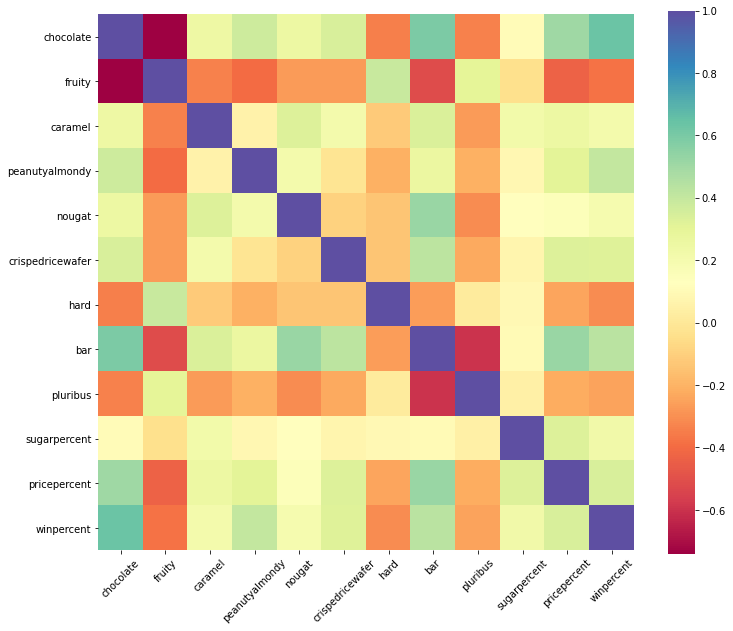

In [14]:
cor = candy[[ 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent']].corr()

f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(cor, square=True, cmap = cmap)
plt.xticks(rotation = 45)

plt.show()

In [15]:
#sns.pairplot(cor)

# Linear Regression

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [18]:
candy.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent', 'types'],
      dtype='object')

In [19]:
X = candy[['chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent']]

y = candy['winpercent']

In [20]:
mfit = model.fit(X, y)

> The coefficient is a factor that describes the relationship with an unknown variable.
- Having `chocolate` in the candy , increases the average winpercent by 19,75 %
- Having `peanutyalmondy` flavor, increases the winpercent  by 10,1 %
- Increasing the `sugarpercent` by 1 unit, the winpercent increases by 9.1%
- Increasing the `pricepercent` by 1 unit, the winpercent decreases by 5.9%

In [75]:

#model.intercept_ ,
red_name, red_val = [], []
green_name, green_val = [], []

for c, x in zip(X.columns,model.coef_) :
    if x<0:        
        red_name.append(c)
        red_val.append(x)
    else:
        blue_name.append(c)
        blue_val.append(x)
    print(f'{c}: {x}')

chocolate: 19.748066977292012
fruity: 9.422322066515896
caramel: 2.224481364934592
peanutyalmondy: 10.07068846664841
nougat: 0.8043306027718045
crispedricewafer: 8.918969809827125
hard: -6.1653265021664865
bar: 0.44154009420601703
pluribus: -0.8544995421467769
sugarpercent: 9.086762861511078
pricepercent: -5.928361425545837


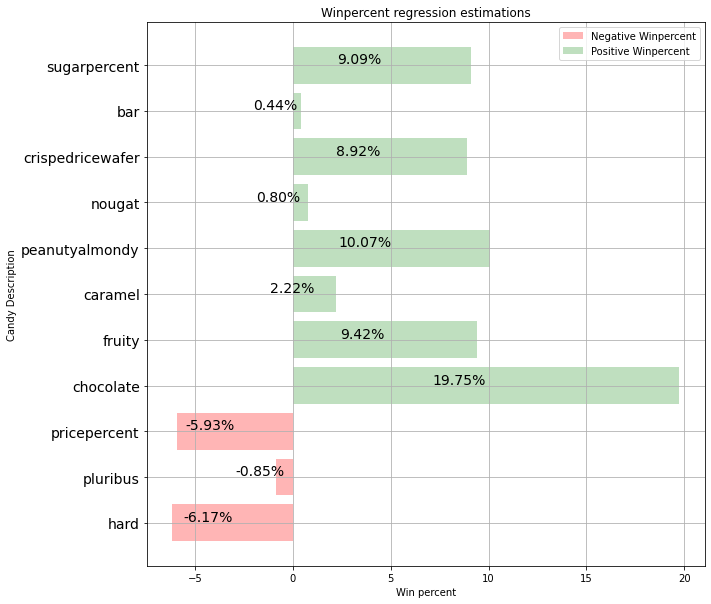

In [131]:
fig, ax = plt.subplots()

ax1 = ax.barh(red_name, red_val, label = "Negative Winpercent", color = 'r', alpha=.29)
ax2 = ax.barh(blue_name, blue_val, label = "Positive Winpercent", color = 'g', alpha=.25)
ax.grid(True)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    
    x, y = p.get_xy() 
    ax.annotate(f'{width:.2f}%', (x +width/2, y + height*0.55), ha='right',fontsize=14)
    
plt.gcf().set_size_inches(10, 10)
plt.legend()
plt.xlabel('Win percent')
plt.ylabel('Candy Description')
plt.title('Winpercent regression estimations')
plt.yticks(fontsize=14)

plt.show()

> The mean squared error tells you how close a regression line is to a set of points

In [22]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred = mfit.predict(X)
y_true = y.to_numpy()
mean_squared_error(y_true, y_pred)

98.37927075848415

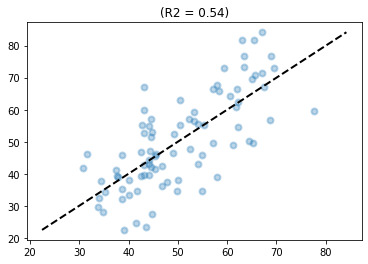

In [23]:
fig = plt.figure()

score = r2_score(y_true, y_pred)
plt.scatter(y_pred, y_true, lw=2, alpha=0.3)
plt.plot([min(y),max(y)], [min(y),max(y)], 
         linestyle='--', lw=2, color='black')
plt.title(label='(R2 = %0.2f)' % (score))
plt.show()